In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load the CSV file
file_path = 'D:\\WeekThree\\data\\MachineLearningRating_v3.csv'
data = pd.read_csv(file_path)

# Print the columns of the DataFrame
print(data.columns)

# Calculate descriptive statistics
descriptive_stats = data.describe()
print(descriptive_stats)

# Variability for Totalpremium and Totalclaims Column
variability = data[['TotalPremium', 'TotalClaims']].var()
print(variability)
# Data Structure
print(data.dtypes)

C:\Users\medha\AppData\Local\Temp\ipykernel_8420\3480456110.py:3: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')
       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count        

In [11]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64


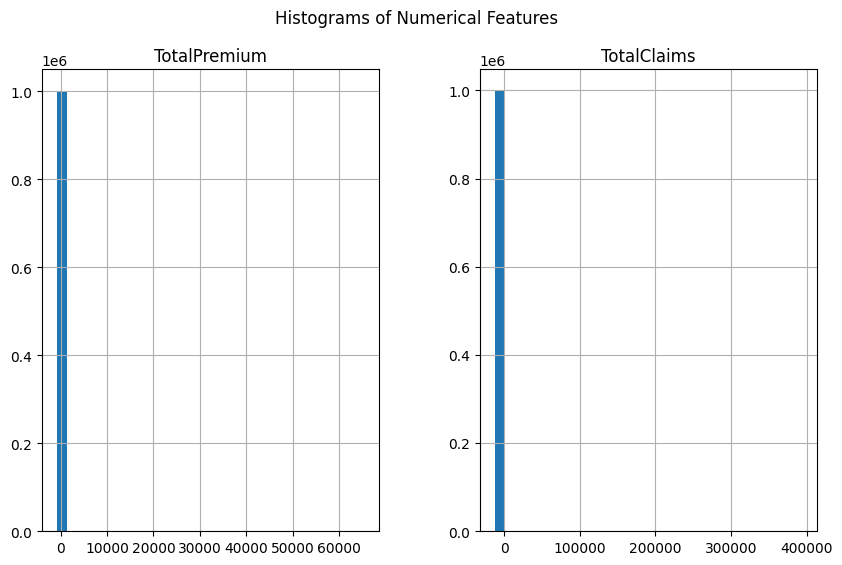

In [13]:
# Histograms for numerical columns
data[['TotalPremium', 'TotalClaims']].hist(bins=30, figsize=(10, 6))
plt.suptitle('Histograms of Numerical Features')
plt.show()

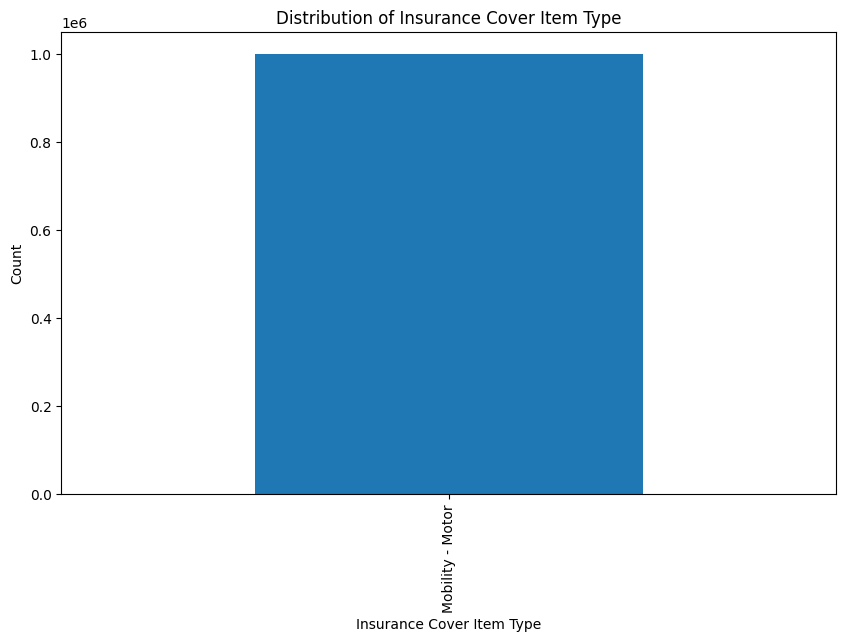

In [15]:
# Bar charts for categorical columns
data['ItemType'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Insurance Cover Item Type')
plt.xlabel('Insurance Cover Item Type')
plt.ylabel('Count')
plt.show()